<a href="https://colab.research.google.com/github/Whoseyashar/Machine-Learning-Advance/blob/main/Intro_to_GNN_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If we look at the GNN layer from the previous examples, the problem lies in the fact that we don’t take into account difference in the number of neighbors. Our layer consists of a simple sum without any normalization coefficients.

The Graph Convolutional Network (GCN) architecture is the blueprint of what a GNN looks like. Introduced by Kipf and Welling in 2017, it is based on the idea of creating an efficient variant of Convolutional Neural Networks (CNNs) applied to graphs. More accurately, it is an approximation of a graph convolution operation in graph signal processing. Thanks to its versatility and ease of use, the GCN has become the most popular GNN in scientific literature. More generally, it is the architecture of choice to create a solid baseline when dealing with graph data.

Reminder: This is how we calculate embedding of node $i$ without taking any optimisation into account:

$h_{i}=\sum_{j\epsilon N_{i}}^{} x_{j}W^{T}$

Where $N_{i}$ is the set of nodes that represent neighbourhud of node $i$, while $W$ is a global weight matrix.

How are we supposed to make meaningful comparisons when values of nodes are so vastly different (some node has one some thousands of connected nodes)?

Fortunately, there is a simple solution: dividing the embedding by the number of neighbors. By definition $D$ matrix can give us a degree of each node. Therefore the inverse of this matrix is $\tilde{D}^{-1}$, which directly give us the normalisation coeficient $\frac{1}{deg(i)}$ to fit into our previous formula:

$h_{i}=\frac{1}{\sqrt{deg(i))}}\sum_{j\epsilon N_{i}}^{} x_{j}W^{T}$

Where $deg(i)$ is a degree of node $i$.

Noticed that features from nodes with a lot of neighbors would spread very easily, unlike features from more isolated nodes. In the original GCN paper, the authors proposed a hybrid normalization to counterbalance this effect. In practice, they assign higher weights to nodes with few neighbors.

But first notice that in Vanilla matrix multiplication we had:

$H = \tilde{A} X W^{T}$

Where $\tilde{A} = A + I$ (reminder: $I$ is identity matrix and $A$ is adjacency)

Now only thing we miss is normalisation degree coeficient.

$H = \tilde{D}^{-\frac{1}{2}}\tilde{A}^{T} \tilde{D}^{-\frac{1}{2}} X W^{T}$

In terms of each individual embedding, the previous matrix multiplication operation can be written as:


$h_{i}=\sum_{j\epsilon N_{i}}^{} \frac{1}{\sqrt{deg(i)} \sqrt{deg(j)}} x_{j}W^{T}$

Let's try to study transformations of the formulas through the implementation

In [1]:
import numpy as np
D = np.array([
    [3, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 2, 0],
    [0, 0, 0, 2]
]) # degree matrix

np.linalg.inv(D) # The inverse of a matrix

np.linalg.inv(D + np.identity(4))

A = np.array([
    [1, 1, 1, 1],
    [1, 1, 0, 0],
    [1, 0, 1, 1],
    [1, 0, 1, 1]
])
print(np.linalg.inv(D + np.identity(4)) @ A)

print(A @ np.linalg.inv(D + np.identity(4)))

[[0.25       0.25       0.25       0.25      ]
 [0.5        0.5        0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.         0.33333333 0.33333333]]
[[0.25       0.5        0.33333333 0.33333333]
 [0.25       0.5        0.         0.        ]
 [0.25       0.         0.33333333 0.33333333]
 [0.25       0.         0.33333333 0.33333333]]


In the previous exercises, vanilla GNN outperformed the Node2Vec model, but how does it compare to a GCN? In this exercises, we will compare their performance on the Cora and Facebook Page-Page datasets.

Compared to the vanilla GNN, the main feature of the GCN is that it considers node degrees to weigh its features. During implementation, analyze the node degrees in both datasets. This information is relevant since it is directly linked to the performance of the GCN.

We will study the same dataset as before, but this time, we will visualise node degree.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 918.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.1 MB/s eta 0:00:00


Processing...
Done!


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
[3. 3. 5. ... 1. 4. 4.]
Counter({2.0: 583, 3.0: 553, 1.0: 485, 4.0: 389, 5.0: 281, 6.0: 131, 7.0: 82, 8.0: 57, 10.0: 26, 9.0: 25, 12.0: 18, 11.0: 14, 17.0: 8, 16.0: 7, 14.0: 6, 15.0: 6, 19.0: 5, 13.0: 5, 21.0: 3, 18.0: 3, 23.0: 3, 32.0: 2, 30.0: 2, 36.0: 1, 78.0: 1, 33.0: 1, 29.0: 1, 34.0: 1, 26.0: 1, 168.0: 1, 22.0: 1, 42.0: 1, 74.0: 1, 44.0: 1, 31.0: 1, 65.0: 1, 40.0: 1})


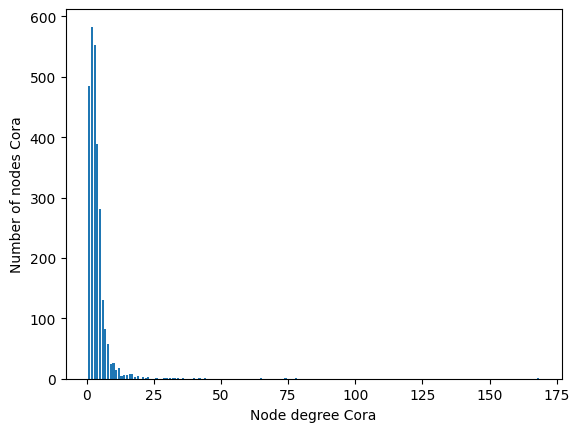

Processing...
Done!


Data(x=[22470, 128], edge_index=[2, 342004], y=[22470], train_mask=[22470], val_mask=[22470], test_mask=[22470])
[ 1. 34. 12. ... 17.  2.  7.]
Counter({1.0: 2658, 2.0: 2307, 3.0: 1843, 4.0: 1516, 5.0: 1359, 6.0: 1114, 7.0: 974, 8.0: 811, 9.0: 731, 10.0: 618, 11.0: 555, 12.0: 494, 13.0: 452, 14.0: 391, 15.0: 380, 17.0: 348, 16.0: 333, 18.0: 316, 19.0: 265, 20.0: 264, 21.0: 233, 22.0: 227, 23.0: 213, 25.0: 200, 24.0: 193, 26.0: 192, 29.0: 151, 27.0: 149, 28.0: 145, 31.0: 132, 33.0: 130, 30.0: 127, 32.0: 112, 35.0: 107, 36.0: 107, 34.0: 102, 37.0: 89, 38.0: 85, 43.0: 76, 40.0: 74, 42.0: 70, 39.0: 70, 44.0: 69, 41.0: 67, 45.0: 59, 51.0: 54, 53.0: 53, 48.0: 52, 47.0: 51, 46.0: 49, 50.0: 48, 49.0: 45, 62.0: 41, 59.0: 38, 60.0: 37, 57.0: 37, 55.0: 36, 56.0: 36, 52.0: 35, 54.0: 34, 61.0: 33, 69.0: 32, 67.0: 29, 58.0: 27, 64.0: 27, 68.0: 25, 65.0: 22, 66.0: 21, 71.0: 20, 70.0: 19, 73.0: 19, 63.0: 19, 76.0: 19, 74.0: 19, 83.0: 18, 75.0: 16, 72.0: 15, 94.0: 13, 78.0: 13, 77.0: 13, 87.0: 13, 90.0:

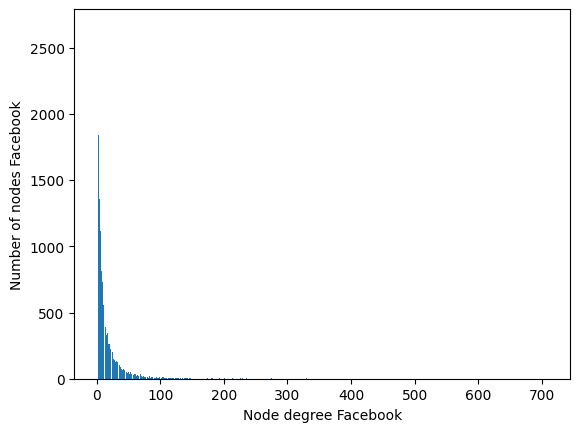

In [2]:
!pip install torch_geometric
from torch_geometric.datasets import Planetoid, FacebookPagePage
from torch_geometric.utils import degree
from torch_geometric.transforms import RandomNodeSplit
from collections import Counter
import matplotlib.pyplot as plt

dataset_cora = Planetoid(root="./datasets", name="Cora")
data_cora = dataset_cora[0]
print(data_cora)

degrees_cora = degree(data_cora.edge_index[0]).numpy()
print(degrees_cora)

numbers_cora = Counter(degrees_cora)
print(numbers_cora)

fig, ax = plt.subplots()
ax.set_xlabel('Node degree Cora')
ax.set_ylabel('Number of nodes Cora')
plt.bar(numbers_cora.keys(), numbers_cora.values())
plt.show()

dataset_facebook = FacebookPagePage(root="./datasets", transform=RandomNodeSplit(num_val=0.1, num_test=0.1))

data_facebook = dataset_facebook[0]
print(data_facebook)

degrees_facebook = degree(data_facebook.edge_index[0]).numpy()
print(degrees_facebook)

numbers_facebook = Counter(degrees_facebook)
print(numbers_facebook)

fig, ax = plt.subplots()
ax.set_xlabel('Node degree Facebook')
ax.set_ylabel('Number of nodes Facebook')
plt.bar(numbers_facebook.keys(), numbers_facebook.values())
plt.show()

This distribution looks exponential with a heavy tail: it ranges from 1 neighbor (485 nodes) to 168 neighbors (1 node)! This is exactly the kind of dataset where we want a normalization process to consider this disbalance.

The same works for FaceBook dataset. This distribution of node degrees looks even more skewed, with a number of neighbors that ranges from 1 to 709. For the same reason, the Facebook Page-Page dataset is also a good case in which to apply a GCN.

Let's now try to implement GNC architecture. We could build our own graph layer but, conveniently enough, PyTorch Geometric already has a predefined GCN layer.

In [3]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv


def accuracy(pred_y, y):
    return ((pred_y == y).sum() / len(y)).item()


class GCN(torch.nn.Module):
    """Graph Convolutional Network"""

    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index)
        h = torch.relu(h)
        h = self.gcn2(h, edge_index)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                     lr=0.01,
                                     weight_decay=5e-4)
        self.train()
        for epoch in range(epochs + 1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            if (epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(
                    f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc * 100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc * 100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc


gcn_cora = GCN(dataset_cora.num_features, 16, dataset_cora.num_classes)
print(gcn_cora)
gcn_cora.fit(data_cora, epochs=100)

acc_cora = gcn_cora.test(data_cora)
print(f'GCN test accuracy Cora: {acc_cora * 100:.2f}%')

gcn_facebook = GCN(dataset_facebook.num_features, 16, dataset_facebook.num_classes)
print(gcn_facebook)
gcn_facebook.fit(data_facebook, epochs=100)

acc_facebook = gcn_facebook.test(data_facebook)
print(f'GCN test accuracy Facebook: {acc_facebook * 100:.2f}%')

GCN(
  (gcn1): GCNConv(1433, 16)
  (gcn2): GCNConv(16, 7)
)
Epoch   0 | Train Loss: 1.955 | Train Acc: 15.00% | Val Loss: 1.93 | Val Acc: 16.60%
Epoch  20 | Train Loss: 0.132 | Train Acc: 100.00% | Val Loss: 0.78 | Val Acc: 75.80%
Epoch  40 | Train Loss: 0.017 | Train Acc: 100.00% | Val Loss: 0.72 | Val Acc: 76.80%
Epoch  60 | Train Loss: 0.015 | Train Acc: 100.00% | Val Loss: 0.70 | Val Acc: 77.00%
Epoch  80 | Train Loss: 0.018 | Train Acc: 100.00% | Val Loss: 0.70 | Val Acc: 77.20%
Epoch 100 | Train Loss: 0.017 | Train Acc: 100.00% | Val Loss: 0.70 | Val Acc: 77.40%
GCN test accuracy Cora: 80.10%
GCN(
  (gcn1): GCNConv(128, 16)
  (gcn2): GCNConv(16, 4)
)
Epoch   0 | Train Loss: 1.535 | Train Acc: 24.98% | Val Loss: 1.54 | Val Acc: 24.97%
Epoch  20 | Train Loss: 0.472 | Train Acc: 84.60% | Val Loss: 0.47 | Val Acc: 84.65%
Epoch  40 | Train Loss: 0.328 | Train Acc: 89.35% | Val Loss: 0.34 | Val Acc: 88.92%
Epoch  60 | Train Loss: 0.283 | Train Acc: 91.02% | Val Loss: 0.31 | Val Acc: 90

We can attribute better scores of GCN to the wide range of node degrees in these two datasets. By normalizing features and considering the number of neighbors of the central node and its own neighbors, the GCN gains a lot of flexibility and can work well with various types of graphs.